<a href="https://colab.research.google.com/github/SwapnilMaheshShinde/cv/blob/main/cvprac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

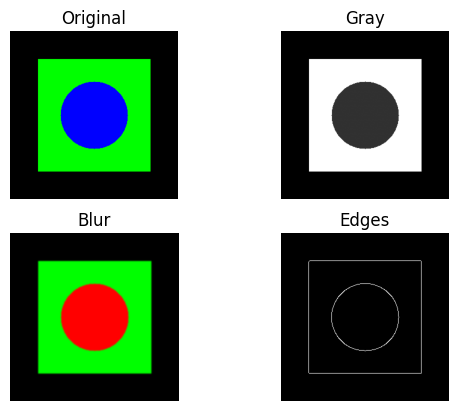

In [1]:
# --- Practical 1: Basic Image Handling and Processing ---
!pip install opencv-python numpy matplotlib

import cv2
import numpy as np
from matplotlib import pyplot as plt

# create a simple image
img = np.zeros((300, 300, 3), np.uint8)
cv2.rectangle(img, (50, 50), (250, 250), (0, 255, 0), -1)
cv2.circle(img, (150, 150), 60, (255, 0, 0), -1)

# process the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img, (5, 5), 0)
edge = cv2.Canny(img, 100, 200)

# show all results
for i, (title, pic) in enumerate(zip(['Original', 'Gray', 'Blur', 'Edges'], [img, gray, blur, edge])):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB) if i == 0 else pic, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()


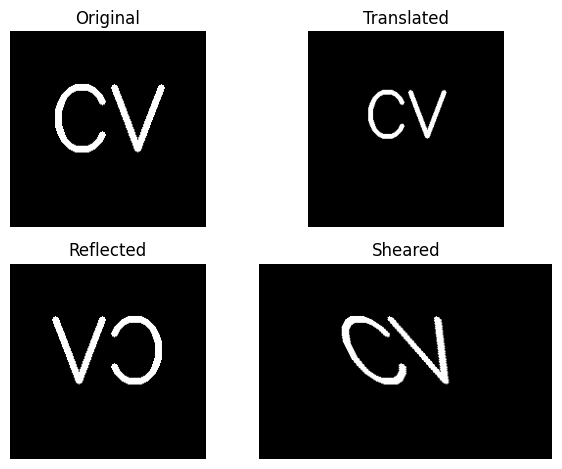

In [25]:
# --- Practical 2: Geometric Transformation ---
!pip install opencv-python numpy matplotlib

import cv2, numpy as np, matplotlib.pyplot as plt

# create base image
img = np.zeros((200,200,3), np.uint8)
cv2.putText(img, 'CV', (40,120), cv2.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 5)
h, w = img.shape[:2]

# transformations
T = cv2.warpAffine(img, np.float32([[1,0,40],[0,1,30]]), (w+80,h+80))           # translation
R = cv2.warpAffine(img, cv2.getRotationMatrix2D((w//2,h//2),45,1), (w,h))        # rotation
F = cv2.warpAffine(img, np.float32([[-1,0,w],[0,1,0]]), (w,h))                   # reflection
S = cv2.warpAffine(img, np.float32([[1,0.5,0],[0,1,0]]), (int(w*1.5),h))         # shearing

# display
for i,(t,p) in enumerate(zip(['Original','Translated','Reflected','Sheared'],[img,T,F,S])):
    plt.subplot(2,2,i+1); plt.imshow(p); plt.title(t); plt.axis('off')
plt.tight_layout(); plt.show()


Homography Matrix:
 [[ 9.34708917e-01  2.79439941e-01 -2.92262343e+01]
 [-1.99263080e-01  1.45291083e+00  1.07737657e+01]
 [-1.04642594e-03  2.03389831e-03  1.00000000e+00]]


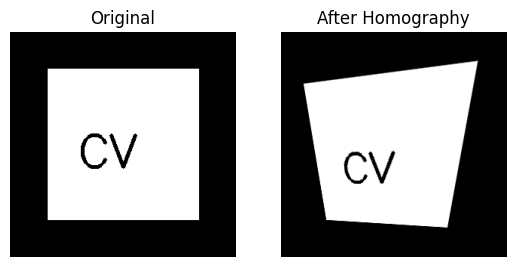

In [26]:
# --- Practical 3: Compute and Apply Homography Matrix ---
!pip install opencv-python numpy matplotlib

import cv2, numpy as np, matplotlib.pyplot as plt

# make base image
img = np.zeros((300,300,3), np.uint8)
cv2.rectangle(img,(50,50),(250,250),(255,255,255),-1)
cv2.putText(img,'CV',(90,180),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,0),3)

# source & destination points
src = np.float32([[50,50],[250,50],[250,250],[50,250]])
dst = np.float32([[30,70],[260,40],[220,260],[60,250]])

# compute homography + warp
H,_ = cv2.findHomography(src,dst)
warp = cv2.warpPerspective(img,H,(300,300))
print("Homography Matrix:\n",H)

# show results
for i,(t,p) in enumerate(zip(['Original','After Homography'],[img,warp])):
    plt.subplot(1,2,i+1); plt.imshow(cv2.cvtColor(p,cv2.COLOR_BGR2RGB))
    plt.title(t); plt.axis('off')
plt.show()



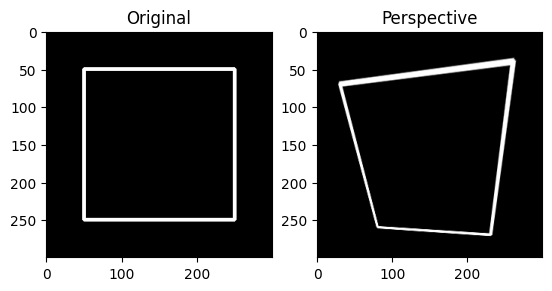

In [5]:
# --- Practical 4: Perspective Transformation ---
!pip install opencv-python numpy matplotlib

import cv2, numpy as np, matplotlib.pyplot as plt

# Create synthetic image
img = np.zeros((300,300,3), np.uint8)
cv2.rectangle(img, (50,50), (250,250), (255,255,255), 3)

pts1 = np.float32([[50,50],[250,50],[50,250],[250,250]])
pts2 = np.float32([[30,70],[260,40],[80,260],[230,270]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(img, matrix, (300,300))

plt.subplot(1,2,1); plt.imshow(img); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(warped); plt.title('Perspective')
plt.show()


In [27]:
# --- Practical 5: Camera Calibration ---
!pip install opencv-python numpy

import cv2, numpy as np

# synthetic data
objp = np.random.rand(10,3).astype(np.float32)*5
objp[:,2] = 0  # flat plane
imgp = np.random.rand(10,2).astype(np.float32)*400

# calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp],[imgp],(400,400),None,None)

print("✅ Calibration Done\nCamera Matrix:\n",mtx)
print("\nDistortion:\n",dist)
print("\nRotation Vectors:\n",rvecs)
print("\nTranslation Vectors:\n",tvecs)


✅ Calibration Done
Camera Matrix:
 [[135.76837059   0.         128.93010915]
 [  0.         -16.67846346 201.54893027]
 [  0.           0.           1.        ]]

Distortion:
 [[ 0.46343559  0.00340865  0.07269301  0.05610483 -0.00245211]]

Rotation Vectors:
 (array([[ 0.18339159],
       [-1.07183528],
       [-0.03473948]]),)

Translation Vectors:
 (array([[-0.72664536],
       [-2.54186034],
       [-2.33065421]]),)


In [20]:
# --- Practical 6: Compute Fundamental Matrix ---
!pip install opencv-python numpy

import cv2
import numpy as np

# Generate 8 synthetic corresponding points (simulating stereo images)
pts1 = np.random.randint(0, 400, (8, 2)).astype(np.float32)
pts2 = pts1 + np.random.randint(-10, 10, (8, 2)).astype(np.float32)  # slightly shifted

# Compute Fundamental Matrix using 8-point algorithm
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_8POINT)

print("✅ Fundamental Matrix Computed Successfully\n")
print("Fundamental Matrix (F):\n", F)


✅ Fundamental Matrix Computed Successfully

Fundamental Matrix (F):
 [[-2.12191947e-05  1.07285655e-03 -1.75531716e-01]
 [-1.11137894e-03  6.05319938e-05  4.06811352e-02]
 [ 1.78962832e-01 -5.56452435e-02  1.00000000e+00]]


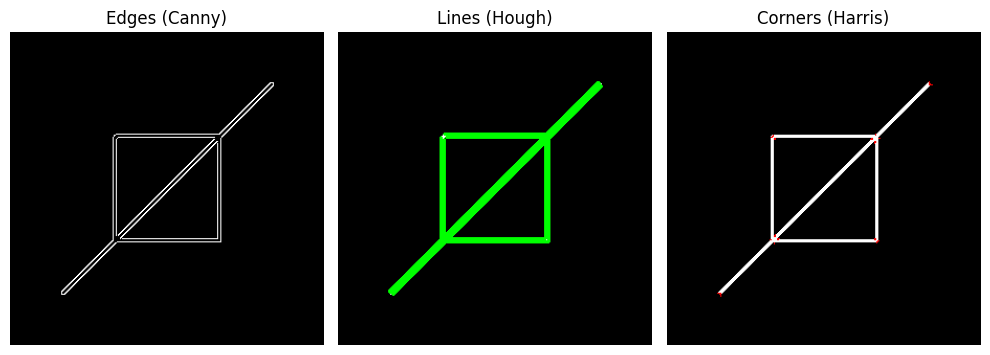

In [29]:
# --- Practical 7: Edge, Line, and Corner Detection ---
!pip install opencv-python numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a simple synthetic image with lines and rectangles
img = np.zeros((300,300,3), np.uint8)
cv2.line(img, (50,250), (250,50), (255,255,255), 2)
cv2.rectangle(img, (100,100), (200,200), (255,255,255), 2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1️⃣ Edge Detection using Canny
edges = cv2.Canny(gray, 50, 150)

# 2️⃣ Line Detection using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, minLineLength=30, maxLineGap=10)
line_img = img.copy()
if lines is not None:
    for l in lines:
        x1, y1, x2, y2 = l[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 3️⃣ Corner Detection using Harris Corner Detector
gray_f = np.float32(gray)
corners = cv2.cornerHarris(gray_f, blockSize=2, ksize=3, k=0.04)
corner_img = img.copy()
corner_img[corners > 0.01 * corners.max()] = [0, 0, 255]  # mark corners red

# 🔳 Display all results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(edges, cmap='gray')
plt.title('Edges (Canny)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title('Lines (Hough)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
plt.title('Corners (Harris)')
plt.axis('off')

plt.tight_layout()
plt.show()


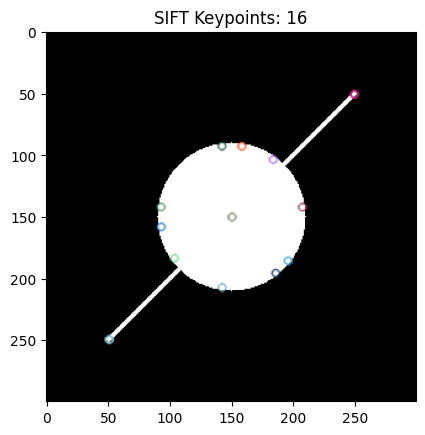

In [30]:
# --- Practical 8: SIFT Feature Descriptor ---
!pip install opencv-python opencv-contrib-python numpy matplotlib

import cv2, numpy as np, matplotlib.pyplot as plt

# Create a synthetic image
img = np.zeros((300,300), np.uint8)
cv2.circle(img, (150,150), 60, 255, -1)
cv2.line(img, (50,250), (250,50), 255, 2)

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)
img_kp = cv2.drawKeypoints(img, keypoints, None)

plt.imshow(img_kp, cmap='gray')
plt.title(f'SIFT Keypoints: {len(keypoints)}')
plt.show()


In [2]:
# --- Practical 9: SURF and HOG Feature Descriptor ---
!pip install opencv-python opencv-contrib-python numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic grayscale image
img = np.zeros((256, 256), np.uint8)
cv2.rectangle(img, (50, 50), (200, 200), 255, -1)  # white square
cv2.circle(img, (128, 128), 40, 0, -1)             # black circle inside

# 1️⃣ SURF Feature Detection and Description
try:
    surf = cv2.xfeatures2d.SURF_create(400)  # Hessian threshold = 400
    kp, des = surf.detectAndCompute(img, None)
    img_surf = cv2.drawKeypoints(img, kp, None, (0,255,0), 4)

    plt.figure(figsize=(5,5))
    plt.imshow(img_surf, cmap='gray')
    plt.title(f'SURF Keypoints: {len(kp)}')
    plt.axis('off')
    plt.show()
    print("✅ SURF Feature Detection Successful")
    print("Number of Keypoints Detected:", len(kp))
    print("Descriptor Shape:", des.shape)
except:
    print("❌ SURF not available in this OpenCV build (use opencv-contrib-python).")

# 2️⃣ HOG (Histogram of Oriented Gradients)
hog = cv2.HOGDescriptor()
h = hog.compute(img)
print("\n✅ HOG Descriptor Computed")
print("HOG Descriptor Shape:", h.shape)


❌ SURF not available in this OpenCV build (use opencv-contrib-python).

✅ HOG Descriptor Computed
HOG Descriptor Shape: (1606500,)


In [4]:
!pip uninstall -y numpy opencv-python opencv-contrib-python
!pip install numpy==1.26.4 opencv-python==4.7.0.72 opencv-contrib-python==4.7.0.72 matplotlib


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
Found existing installation: opencv-contrib-python 4.7.0.72
Uninstalling opencv-contrib-python-4.7.0.72:
  Successfully uninstalled opencv-contrib-python-4.7.0.72
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 141.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 8.4 MB/s eta 0:00:00
Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (67.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou